In [1]:
#import Func_Lib as func
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
plt.style.use('seaborn-white')
import time
import os
from glob import glob
import sys
import seaborn as sns

First we are loadding the data of annual maximums for different warming scenarios. Calling them annualmaxT, T referin g to warming.
We are also loading the PRMS runs of SWGs and calling them dataframesT.

In [2]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg3.5/annualmaxbig*.npy')
annualmax_arrays=np.array([np.load(f) for f in filename])
print(annualmax_arrays.shape)

filename=glob('/cluster/tufts/lamontagnelab/gshabe01/deg_tempC.3.5/*.csv')

dataframes=[pd.read_csv(f) for f in filename]

(100, 64, 10006)


In [3]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg8/annualmaxbig*.npy')
annualmax_arrays8=np.array([np.load(f) for f in filename])
print(annualmax_arrays8.shape)

filename=glob('/cluster/projects/lamontagnelab/gshabe01/deg_tempC.8/*.csv')

dataframes8=[pd.read_csv(f) for f in filename]

(100, 64, 10006)


In [4]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg6/annualmaxbig*.npy')
annualmax_arrays6=np.array([np.load(f) for f in filename])
print(annualmax_arrays6.shape)

filename=glob('/cluster/tufts/lamontagnelab/gshabe01/deg_tempC.6/*.csv')

dataframes6=[pd.read_csv(f) for f in filename]

(100, 64, 10006)


In [5]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg0/annualmaxbig*.npy')
annualmax0_arrays=np.array([np.load(f) for f in filename])
print(annualmax0_arrays.shape)

filename=glob('/cluster/tufts/lamontagnelab/gshabe01/deg_tempC.0/deg_tempC.0/*.csv')

dataframes0=[pd.read_csv(f) for f in filename]

(100, 64, 10006)


Now we are loading the historical record 

In [6]:
data=pd.read_csv('/cluster/tufts/lamontagnelab/gshabe01/livneh.csv')
data=data.set_index(pd.to_datetime(data['date']))
data=data.loc['1950-01-01':'2013-12-31'].drop(columns=['date'])

here we are generating a dataframe of PRMS runs for SWGs for 0 degree warming 

In [7]:
PRMS0_array=pd.DataFrame(np.zeros((len(dataframes0[1]),100)))
for i in range(0,100):
    PRMS0_array[i]=dataframes0[i][' 2']
PRMS0_array['date']=pd.to_datetime(dataframes0[0]['Date'])
PRMS0_array=PRMS0_array.set_index('date')
PRMS0_array['obs']=np.array(data['Qgage'])
PRMS0_array['histmodel']=np.array(data['Qmodel'])
PRMS0_annualmax=pd.DataFrame(np.sort(PRMS0_array.resample('Y').max(),axis=0))
PRMS0_annualmax['non_Exceedance']=PRMS0_annualmax[0].rank()/len(PRMS0_annualmax)

In [7]:
from scipy.stats import pearson3
flood100Y0=np.zeros((annualmax0_arrays.shape[0],10000))

for i in range(0,annualmax0_arrays.shape[0]):
    
    flood100Y0[i,:]=np.exp(np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax0_arrays[i,:,0:10000]))).std()*abs(pearson3.ppf(0.99, np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).skew())))

#flood100YPRMS=PRMS_annualmax.drop(columns=['non_Exceedance']).mean()+PRMS_annualmax.drop(columns=['non_Exceedance']).std()*(pearson3.ppf(0.99, PRMS_annualmax.drop(columns=['non_Exceedance']).skew()))

We are looking as central moments of 100-year flood for no warming scenario  (flood100Y0). central moments : mean , mode median

In [8]:
from scipy import stats
import statistics
#print(statistics.mode(flood100Y0,axis=None))
print(np.mean(flood100Y0))
print(np.median(flood100Y0))

4080.7564117218176
3822.8244507770396


In [9]:
counts, bins = np.histogram(flood100Y0, bins=1000)
max_bin = np.argmax(counts)
bins[max_bin:max_bin+2].mean()

3531.8830323310704

In [10]:

flood100Y35=np.zeros((annualmax_arrays.shape[0],10000))

for i in range(0,annualmax_arrays.shape[0]):
    
    flood100Y35[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays[i,:,0:10000]))).std()*abs(pearson3.ppf(0.99, np.log(pd.DataFrame(annualmax_arrays[i,:,0:10000])).skew())))

In [11]:
#print(statistics.mode(flood100Y0,axis=None))
print(np.mean(flood100Y35))
print(np.median(flood100Y35))

4696.007989714888
4397.75296567946


In [13]:

flood100Y6=np.zeros((annualmax_arrays6.shape[0],10000))

for i in range(0,annualmax_arrays6.shape[0]):
    flood100Y6[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays6[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays6[i,:,0:10000]))).std()*abs(pearson3.ppf(0.99, np.log(pd.DataFrame(annualmax_arrays6[i,:,0:10000])).skew())))
    

In [14]:
#print(statistics.mode(flood100Y0,axis=None))
print(np.mean(flood100Y6))
print(np.median(flood100Y6))

5671.8767422661695
5301.447158039454


In [15]:

flood100Y8=np.zeros((annualmax_arrays8.shape[0],10000))

for i in range(0,annualmax_arrays8.shape[0]):
    flood100Y8[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays8[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays8[i,:,0:10000]))).std()*abs(pearson3.ppf(0.99, np.log(pd.DataFrame(annualmax_arrays8[i,:,0:10000])).skew())))
    

In [16]:
#print(statistics.mode(flood100Y0,axis=None))
print(np.mean(flood100Y8))
print(np.median(flood100Y8))

6876.2627756691945
6407.194698054191


In [18]:
print((np.median(flood100Y8)-np.median(flood100Y0))/np.median(flood100Y0))

0.6760368624177455

([<matplotlib.axis.YTick at 0x2aae53f336d8>,
 <a list of 5 Text yticklabel objects>)

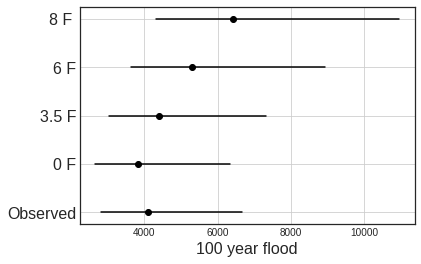

In [19]:
max100SWM8=np.percentile(flood100Y8,95)
min100SWM8=np.percentile(flood100Y8,5)

max100SWM6=np.percentile(flood100Y6,95)
min100SWM6=np.percentile(flood100Y6,5)

max100SWM35=np.percentile(flood100Y35,95)
min100SWM35=np.percentile(flood100Y35,5)

max100SWM0=np.percentile(flood100Y0,95)
min100SWM0=np.percentile(flood100Y0,5)

f=plt.figure()

plt.plot([min100SWM0,max100SWM0],[2,2],color='k')
plt.scatter(np.median(flood100Y0), 2,color='k')

plt.plot([min100SWM35,max100SWM35],[3,3],color='k')
plt.scatter(np.median(flood100Y35), 3,color='k')

plt.plot([min100SWM6,max100SWM6],[4,4],color='k')
plt.scatter(np.median(flood100Y6), 4,color='k')

plt.plot([min100SWM8,max100SWM8],[5,5],color='k')
plt.scatter(np.median(flood100Y8), 5,color='k')

plt.scatter(4100.97,1,color='k')
plt.plot([2814,6661],[1,1],color='k')
plt.grid()

plt.xlabel('100 year flood', size= 16)
plt.yticks([1,2,3,4,5],['Observed','0 F','3.5 F','6 F','8 F '], size= 16)
#plt.title('SWG + SWM Across Different Temperature Scenarios')

#f.savefig("linewisker100Y.png", bbox_inches='tight', dpi=1000)

([<matplotlib.axis.YTick at 0x2b2b00b5eac8>,
 <a list of 4 Text yticklabel objects>)

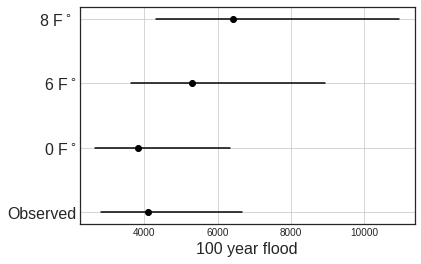

In [15]:
max100SWM8=np.percentile(flood100Y8,95)
min100SWM8=np.percentile(flood100Y8,5)

max100SWM6=np.percentile(flood100Y6,95)
min100SWM6=np.percentile(flood100Y6,5)

max100SWM35=np.percentile(flood100Y35,95)
min100SWM35=np.percentile(flood100Y35,5)

max100SWM0=np.percentile(flood100Y0,95)
min100SWM0=np.percentile(flood100Y0,5)

f=plt.figure()

plt.plot([min100SWM0,max100SWM0],[2,2],color='k')
plt.scatter(np.median(flood100Y0), 2,color='k')

#plt.plot([min100SWM35,max100SWM35],[3,3],color='k')
#plt.scatter(np.median(flood100Y35), 3,color='k')

plt.plot([min100SWM6,max100SWM6],[3,3],color='k')
plt.scatter(np.median(flood100Y6), 3,color='k')

plt.plot([min100SWM8,max100SWM8],[4,4],color='k')
plt.scatter(np.median(flood100Y8), 4,color='k')

plt.scatter(4100.97,1,color='k')
plt.plot([2814,6661],[1,1],color='k')
plt.grid()

plt.xlabel('100 year flood', size= 16)
plt.yticks([1,2,3,4],['Observed','0 F$^\circ$','6 F$^\circ$','8 F$^\circ$ '], size=16)

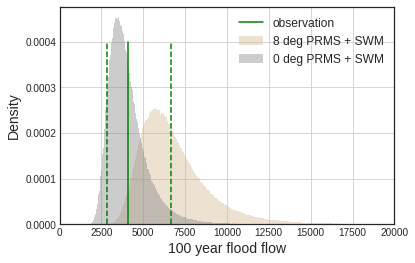

In [16]:
import seaborn as sns
f=plt.figure()
sns.distplot(flood100Y8.flatten(),kde=False, color='tan',label='8 deg PRMS + SWM',norm_hist=True,bins=1000)
sns.distplot(flood100Y0.flatten(),kde=False, color='gray',label='0 deg PRMS + SWM',norm_hist=True,bins=1000)

#sns.distplot(flood100YPRMS,kde=False, color='cadetblue',label='PRMS',norm_hist=True,bins=20)
#sns.distplot(flood100YPRMS0,kde=False, color='rosybrown',label='PRMS0',norm_hist=True,bins=20)
plt.plot([4100.97,4100.97],[0,0.0004], color='g',linestyle='solid',label='observation')
#plt.plot([flood100YPRMS[101],flood100YPRMS[101]],[0,0.0004], color='k',linestyle='solid',label='historyPRMS')
plt.plot([2814,2814],[0,0.0004], color='g',linestyle='dashed')
plt.plot([6661,6661],[0,0.0004], color='g',linestyle='dashed')
#plt.plot([2814,6661],[1,1],color='k')
plt.xlabel('100 year flood flow',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.xlim(0,20000)
plt.legend(prop={'size': 12})
plt.grid()
f.savefig("histogram100Y.png", bbox_inches='tight', dpi=1000)

In [20]:

flood50Y0=np.zeros((annualmax0_arrays.shape[0],10000))

for i in range(0,annualmax0_arrays.shape[0]):
    
    flood50Y0[i,:]=np.exp(np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax0_arrays[i,:,0:10000]))).std()*abs(pearson3.ppf(0.98, np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).skew())))


flood50Y35=np.zeros((annualmax_arrays.shape[0],10000))

for i in range(0,annualmax_arrays.shape[0]):
    
    flood50Y35[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays[i,:,0:10000]))).std()*abs(pearson3.ppf(0.98, np.log(pd.DataFrame(annualmax_arrays[i,:,0:10000])).skew())))

flood50Y6=np.zeros((annualmax_arrays6.shape[0],10000))

for i in range(0,annualmax_arrays6.shape[0]):
    flood50Y6[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays6[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays6[i,:,0:10000]))).std()*abs(pearson3.ppf(0.98, np.log(pd.DataFrame(annualmax_arrays6[i,:,0:10000])).skew())))
        
    
    
    

flood50Y8=np.zeros((annualmax_arrays8.shape[0],10000))

for i in range(0,annualmax_arrays8.shape[0]):
    flood50Y8[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays8[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays8[i,:,0:10000]))).std()*abs(pearson3.ppf(0.98, np.log(pd.DataFrame(annualmax_arrays8[i,:,0:10000])).skew())))
    

In [12]:
flood50Y0=np.zeros((annualmax0_arrays.shape[0],10000))

for i in range(0,annualmax0_arrays.shape[0]):
    
    flood50Y0[i,:]=np.exp(np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax0_arrays[i,:,0:10000]))).std()*abs(pearson3.ppf(0.98, np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).skew())))



In [21]:
#print(stats.mode(flood50Y0,axis=None))
print(np.mean(flood50Y0))
print(np.median(flood50Y0))

3398.2297576886035
3248.391893190973


In [14]:


counts, bins = np.histogram(flood50Y0, bins=1000)
max_bin = np.argmax(counts)
bins[max_bin:max_bin+2].mean()

2974.107979426639

([<matplotlib.axis.YTick at 0x2b4581da4dc0>,
 [Text(0, 1, 'Observed'),
  Text(0, 2, '0 F$^\\circ$'),
  Text(0, 3, '3.5 F$^\\circ$'),
  Text(0, 4, '6 F$^\\circ$'),
  Text(0, 5, '8 F$^\\circ$ ')])

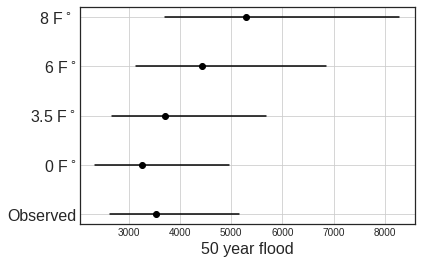

In [15]:
max50SWM8=np.percentile(flood50Y8,95)
min50SWM8=np.percentile(flood50Y8,5)

max50SWM6=np.percentile(flood50Y6,95)
min50SWM6=np.percentile(flood50Y6,5)

max50SWM35=np.percentile(flood50Y35,95)
min50SWM35=np.percentile(flood50Y35,5)

max50SWM0=np.percentile(flood50Y0,95)
min50SWM0=np.percentile(flood50Y0,5)

f=plt.figure()

plt.plot([min50SWM0,max50SWM0],[2,2],color='k')
plt.scatter(np.median(flood50Y0), 2,color='k')

plt.plot([min50SWM35,max50SWM35],[3,3],color='k')
plt.scatter(np.median(flood50Y35), 3,color='k')

plt.plot([min50SWM6,max50SWM6],[4,4],color='k')
plt.scatter(np.median(flood50Y6), 4,color='k')

plt.plot([min50SWM8,max50SWM8],[5,5],color='k')
plt.scatter(np.median(flood50Y8), 5,color='k')

plt.scatter(3525.45,1,color='k')

plt.plot([2622,5142],[1,1],color='k')
plt.grid()

plt.xlabel('50 year flood', size=16)
plt.yticks([1,2,3,4,5],['Observed','0 F$^\circ$','3.5 F$^\circ$','6 F$^\circ$','8 F$^\circ$ '], size=16)

([<matplotlib.axis.YTick at 0x2b2affa179b0>,
 <a list of 4 Text yticklabel objects>)

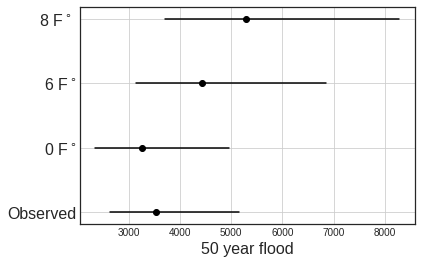

In [22]:
max50SWM8=np.percentile(flood50Y8,95)
min50SWM8=np.percentile(flood50Y8,5)

max50SWM6=np.percentile(flood50Y6,95)
min50SWM6=np.percentile(flood50Y6,5)

max50SWM35=np.percentile(flood50Y35,95)
min50SWM35=np.percentile(flood50Y35,5)

max50SWM0=np.percentile(flood50Y0,95)
min50SWM0=np.percentile(flood50Y0,5)

f=plt.figure()

plt.plot([min50SWM0,max50SWM0],[2,2],color='k')
plt.scatter(np.median(flood50Y0), 2,color='k')

#plt.plot([min50SWM35,max50SWM35],[3,3],color='k')
#plt.scatter(np.median(flood50Y35), 3,color='k')

plt.plot([min50SWM6,max50SWM6],[3,3],color='k')
plt.scatter(np.median(flood50Y6), 3,color='k')

plt.plot([min50SWM8,max50SWM8],[4,4],color='k')
plt.scatter(np.median(flood50Y8), 4,color='k')

plt.scatter(3525.45,1,color='k')

plt.plot([2622,5142],[1,1],color='k')
plt.grid()

plt.xlabel('50 year flood', size=16)
plt.yticks([1,2,3,4],['Observed','0 F$^\circ$','6 F$^\circ$','8 F$^\circ$ '], size=16)
#plt.title('SWG + SWM  Across Different Temperature Scenario')
#f.savefig("linewisker50Y.png", bbox_inches='tight', dpi=1000)

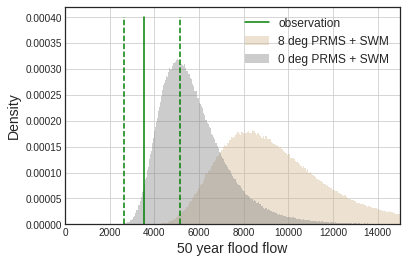

In [58]:
import seaborn as sns
f=plt.figure()
sns.distplot(flood50Y8.flatten(),kde=False, color='tan',label='8 deg PRMS + SWM',norm_hist=True,bins=1000)
sns.distplot(flood50Y0.flatten(),kde=False, color='gray',label='0 deg PRMS + SWM',norm_hist=True,bins=1000)

#sns.distplot(flood100YPRMS,kde=False, color='cadetblue',label='PRMS',norm_hist=True,bins=20)
#sns.distplot(flood100YPRMS0,kde=False, color='rosybrown',label='PRMS0',norm_hist=True,bins=20)
plt.plot([3525.45,3525.45],[0,0.0004], color='g',linestyle='solid',label='observation')
#plt.plot([flood100YPRMS[101],flood100YPRMS[101]],[0,0.0004], color='k',linestyle='solid',label='historyPRMS')
plt.plot([2622,2622],[0,0.0004], color='g',linestyle='dashed')
plt.plot([5142,5142],[0,0.0004], color='g',linestyle='dashed')
#plt.plot([2814,6661],[1,1],color='k')
plt.xlabel('50 year flood flow',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.xlim(0,15000)
plt.legend(prop={'size': 12})
plt.grid()
f.savefig("histogram50Y.png", bbox_inches='tight', dpi=1000)

In [22]:

flood500Y0=np.zeros((annualmax0_arrays.shape[0],10000))

for i in range(0,annualmax0_arrays.shape[0]):
    
    flood500Y0[i,:]=np.exp(np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax0_arrays[i,:,0:10000]))).std()*abs(pearson3.ppf(0.998, np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).skew())))


flood500Y35=np.zeros((annualmax_arrays.shape[0],10000))

for i in range(0,annualmax_arrays.shape[0]):
    
    flood500Y35[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays[i,:,0:10000]))).std()*abs(pearson3.ppf(0.998, np.log(pd.DataFrame(annualmax_arrays[i,:,0:10000])).skew())))

flood500Y6=np.zeros((annualmax_arrays6.shape[0],10000))

for i in range(0,annualmax_arrays6.shape[0]):
    flood500Y6[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays6[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays6[i,:,0:10000]))).std()*abs(pearson3.ppf(0.998, np.log(pd.DataFrame(annualmax_arrays6[i,:,0:10000])).skew())))
        
    
flood500Y8=np.zeros((annualmax_arrays8.shape[0],10000))

for i in range(0,annualmax_arrays8.shape[0]):
    flood500Y8[i,:]=np.exp(np.log(pd.DataFrame(annualmax_arrays8[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax_arrays8[i,:,0:10000]))).std()*abs(pearson3.ppf(0.998, np.log(pd.DataFrame(annualmax_arrays8[i,:,0:10000])).skew())))
    

In [23]:
print((np.median(flood50Y8)-np.median(flood50Y0))/np.median(flood50Y0))
print((np.median(flood100Y8)-np.median(flood100Y0))/np.median(flood100Y0))
print((np.median(flood500Y8)-np.median(flood500Y0))/np.median(flood500Y0))

0.627361775989232
0.6760368624177455
0.7815934626875065


In [24]:
print((np.median(flood50Y35)-np.median(flood50Y0))/np.median(flood50Y0))
print((np.median(flood100Y35)-np.median(flood100Y0))/np.median(flood100Y0))
print((np.median(flood500Y35)-np.median(flood500Y0))/np.median(flood500Y0))

0.14166162818051875
0.1503936480226182
0.16760783478136812


In [35]:
(np.median(flood100Y8)-np.median(flood100Y35))/np.median(flood100Y35)/4.5*100

10.153881099717315

In [24]:
flood500Y0=np.zeros((annualmax0_arrays.shape[0],10000))

for i in range(0,annualmax0_arrays.shape[0]):
    
    flood500Y0[i,:]=np.exp(np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).mean()+np.log(pd.DataFrame((annualmax0_arrays[i,:,0:10000]))).std()*abs(pearson3.ppf(0.998, np.log(pd.DataFrame(annualmax0_arrays[i,:,0:10000])).skew())))



In [25]:
#print(stats.mode(flood500Y0,axis=None))
print(np.mean(flood500Y0))
print(np.median(flood500Y0))

6109.360507428155
5370.37790634098


In [26]:


counts, bins = np.histogram(flood500Y0, bins=1000)
max_bin = np.argmax(counts)
bins[max_bin:max_bin+2].mean()

4545.693984854361

([<matplotlib.axis.YTick at 0x2b2b7d7d90b8>,
 <a list of 5 Text yticklabel objects>)

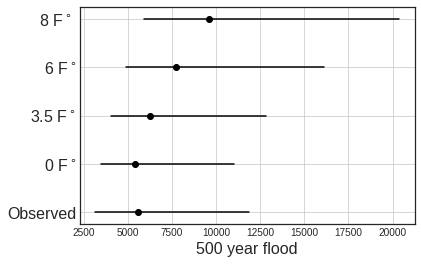

In [27]:
max500SWM8=np.percentile(flood500Y8,95)
min500SWM8=np.percentile(flood500Y8,5)

max500SWM6=np.percentile(flood500Y6,95)
min500SWM6=np.percentile(flood500Y6,5)

max500SWM35=np.percentile(flood500Y35,95)
min500SWM35=np.percentile(flood500Y35,5)

max500SWM0=np.percentile(flood500Y0,95)
min500SWM0=np.percentile(flood500Y0,5)

plt.figure()

plt.plot([min500SWM0,max500SWM0],[2,2],color='k')
plt.scatter(np.median(flood500Y0), 2,color='k')

plt.plot([min500SWM35,max500SWM35],[3,3],color='k')
plt.scatter(np.median(flood500Y35), 3,color='k')

plt.plot([min500SWM6,max500SWM6],[4,4],color='k')
plt.scatter(np.median(flood500Y6), 4,color='k')

plt.plot([min500SWM8,max500SWM8],[5,5],color='k')
plt.scatter(np.median(flood500Y8), 5,color='k')

plt.scatter(5577.48,1,color='k')

plt.plot([3128,11858],[1,1],color='k')
plt.grid()

plt.xlabel('500 year flood', size=16)
plt.yticks([1,2,3,4,5],['Observed','0 F$^\circ$','3.5 F$^\circ$','6 F$^\circ$','8 F$^\circ$ '], size=16)
#plt.title('SWG + SWM  Across Different Temperature Scenario')

In [2]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg0/day7lowbig_*.npy')
low7_arrays0=np.array([np.load(f) for f in filename])
print(low7_arrays0.shape)

filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg8/day7lowbig*.npy')
low7_arrays8=np.array([np.load(f) for f in filename])
print(low7_arrays8.shape)

filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg3.5/day7lowbig*.npy')
low7_arrays35=np.array([np.load(f) for f in filename])
print(low7_arrays35.shape)

filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg6/day7lowbig*.npy')
low7_arrays6=np.array([np.load(f) for f in filename])
print(low7_arrays6.shape)

(100, 64, 10006)
(100, 64, 10006)
(100, 64, 10006)
(100, 64, 10006)


In [3]:
def low7day(Q,data,n):
    s=pd.DataFrame(Q.T,index=data['date'])
    data=data.set_index('date')
    low7day=np.array(s.rolling(7).mean().resample('Y').min())
    low7daysort=pd.DataFrame(np.zeros(low7day.shape))
    for i in range(0,n):
           low7daysort[i]=np.sort(low7day[:,i])[::-1]
    
    low7daysort['rank']=(low7daysort.index) + 1
    low7daysort['Exeedance']=low7daysort['rank']/(len(low7daysort)+1)
    low7daysort['non_Exceedance']=1-low7daysort['Exeedance']
    
    low7dayobs=data['Qgage'].rolling(7).mean().resample('Y').min()
    low7daymodel=data['Qmodel'].rolling(7).mean().resample('Y').min()
    low7daysort['obs']=np.sort(low7dayobs)[::-1]
    low7daysort['model']=np.sort(low7daymodel)[::-1]
    l7=np.array(low7daysort)[:,0:n]
    from scipy.stats import norm
    plt.figure()
    # for i in range(0,n):
    #     plt.plot(norm.ppf(low7daysort['Exeedance']),low7daysort[i],color='silver',lw=1)
    plt.fill_between(norm.ppf(low7daysort['Exeedance']),np.min(l7,axis=1),np.max(l7,axis=1),color='silver')
    ax2=plt.plot(norm.ppf(low7daysort['Exeedance']),low7daysort['obs'], color='green',lw=2)
    ax1=plt.plot(norm.ppf(low7daysort['Exeedance']),low7daysort['model'], color='k',lw=2)
    plt.title('7 Day Low Flow')
    plt.ylabel('flow')
    plt.xlabel('Exceedance Normal Inverse')
    plt.legend([ax1, ax2], ['deter-model','observation' ], loc='upper right')
    plt.grid()
    return low7daysort

In [4]:
data=pd.read_excel('/cluster/tufts/lamontagnelab/gshabe01/livneh.xlsx')
data=data.set_index(pd.to_datetime(data['date']))
data['month']=pd.DatetimeIndex(data['date']).month
data=data.loc['1950-01-01':'2013-12-31'].drop(columns=['date'])

obs_7Q10=data['Qgage'].rolling(7).mean().resample('Y').min().sort_values()[6]

In [5]:
low7_0=np.zeros(low7_arrays0.shape)
low7_8=np.zeros(low7_arrays8.shape)
low7_6=np.zeros(low7_arrays6.shape)
low7_35=np.zeros(low7_arrays35.shape)

for i in range(0,low7_arrays0.shape[0]):
    low7_0[i]=np.sort(low7_arrays0[i],axis=0)[0:10000]
    low7_8[i]=np.sort(low7_arrays8[i],axis=0)[0:10000]
    low7_6[i]=np.sort(low7_arrays6[i],axis=0)[0:10000]
    low7_35[i]=np.sort(low7_arrays35[i],axis=0)[0:10000]





In [6]:
obs_7Q10

5.71428571428572

In [7]:
low7Q10_0=np.zeros((low7_arrays0.shape[0],10000))
low7Q10_8=np.zeros((low7_arrays8.shape[0],10000))
low7Q10_6=np.zeros((low7_arrays6.shape[0],10000))
low7Q10_35=np.zeros((low7_arrays35.shape[0],10000))


for i in range(0,low7_arrays0.shape[0]):
    low7Q10_0[i,:]=low7_0[i][6,0:10000]
    low7Q10_8[i,:]=low7_8[i][6,0:10000]
    low7Q10_6[i,:]=low7_6[i][6,0:10000]
    low7Q10_35[i,:]=low7_35[i][6,0:10000]

([<matplotlib.axis.YTick at 0x2b320e33e0f0>,
 <a list of 4 Text yticklabel objects>)

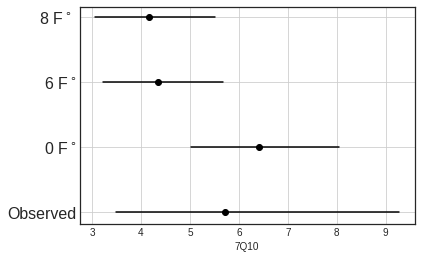

In [8]:
min7Q108deg= np.percentile(low7Q10_8[0:10000],5)
max7Q108deg=np.percentile(low7Q10_8[0:10000],95)

min7Q106deg= np.percentile(low7Q10_6[0:10000],5)
max7Q106deg=np.percentile(low7Q10_6[0:10000],95)


min7Q1035deg= np.percentile(low7Q10_35[0:10000],5)
max7Q1035deg=np.percentile(low7Q10_35[0:10000],95)

min7Q100deg= np.percentile(low7Q10_0[0:10000],5)
max7Q100deg=np.percentile(low7Q10_0[0:10000],95)


plt.figure()


plt.plot([min7Q108deg,max7Q108deg],[4,4],color='k')
plt.scatter(np.median(low7Q10_8[0:10000]), 4,color='k')

plt.plot([min7Q106deg,max7Q106deg],[3,3],color='k')
plt.scatter(np.median(low7Q10_6[0:10000]), 3,color='k')

#plt.plot([min7Q1035deg,max7Q1035deg],[3,3],color='k')
#plt.scatter(np.median(low7Q10_35[0:10000]), 3,color='k')
plt.plot([min7Q100deg,max7Q100deg],[2,2],color='k')
plt.scatter(np.median(low7Q10_0[0:10000]), 2,color='k')
plt.scatter(obs_7Q10,1,color='k')
plt.plot([3.48,9.28],[1,1],color='k')


plt.grid()

plt.xlabel('7Q10')
plt.yticks([1,2,3,4],['Observed','0 F$^\circ$','6 F$^\circ$','8 F$^\circ$ '], size=16)
#plt.title('SWG +SWM Across Different Temperature Scenario')

([<matplotlib.axis.YTick at 0x2b320e5076d8>,
 <a list of 5 Text yticklabel objects>)

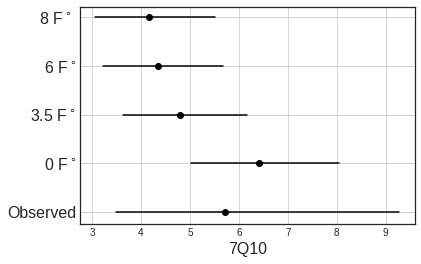

In [10]:
plt.figure()


plt.plot([min7Q108deg,max7Q108deg],[5,5],color='k')
plt.scatter(np.median(low7Q10_8[0:10000]), 5,color='k')

plt.plot([min7Q106deg,max7Q106deg],[4,4],color='k')
plt.scatter(np.median(low7Q10_6[0:10000]), 4,color='k')

plt.plot([min7Q1035deg,max7Q1035deg],[3,3],color='k')
plt.scatter(np.median(low7Q10_35[0:10000]), 3,color='k')
plt.plot([min7Q100deg,max7Q100deg],[2,2],color='k')
plt.scatter(np.median(low7Q10_0[0:10000]), 2,color='k')
plt.scatter(obs_7Q10,1,color='k')
plt.plot([3.48,9.28],[1,1],color='k')


plt.grid()

plt.xlabel('7Q10', size=16)
plt.yticks([1,2,3,4,5],['Observed','0 F$^\circ$','3.5 F$^\circ$','6 F$^\circ$','8 F$^\circ$ '], size=16)
#plt.title('SWG +SWM Across Different Temperature Scenario')

In [18]:
R=np.arange(0,8.5,0.5)
Qdailytest=pd.DataFrame(np.zeros((10000*100,17)))

filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_median*.npy' %0)
test=np.array([np.load(f) for f in filename])
Qdailytest[0]=test.flatten()

for r in range(1,17):
    n=Decimal(R[r]).normalize()
    filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
    test=np.array([np.load(f) for f in filename])
    Qdailytest[r]=test.flatten()

In [13]:
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_median*.npy' %0)
test=np.array([np.load(f) for f in filename])
test.shape

(100, 10000)

In [19]:
data=pd.read_csv('/cluster/tufts/lamontagnelab/gshabe01/livneh.csv')
data=data.set_index(pd.to_datetime(data['date']))
data=data.loc['1950-01-01':'2013-12-31'].drop(columns=['date'])
data['Qgage'].median()

70.0

In [44]:
ticks=pd.DataFrame(np.arange(0,18))
ticks.loc[1:]=np.arange(0,8.5,.5)
ticks.loc[0] = 'obs'
ticks

,0
0,obs
1,0
2,0.5
3,1
4,1.5
5,2
6,2.5
7,3
8,3.5
9,4


([<matplotlib.axis.YTick at 0x2af076593dd8>,
 <a list of 18 Text yticklabel objects>)

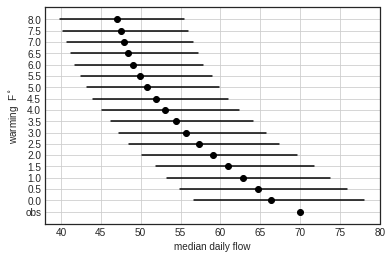

In [48]:

minQ=np.zeros(17)
maxQ=np.zeros(17)
for r in range(0,17):
    minQ[r]= np.percentile(Qdailytest[r],5)
    maxQ[r]=np.percentile(Qdailytest[r],95)



plt.figure()
for r in range(0,17):
    plt.plot([minQ[r],maxQ[r]],[r+1,r+1],color='k')
    plt.scatter(np.median(Qdailytest[r]), r+1,color='k')
# plt.scatter(np.median(Qtest100), 5,color='k')
# plt.plot([minQ_70,maxQ_70],[4,4],color='k')
# plt.scatter(np.median(Qtest), 4,color='k')
# plt.plot([minQ_50,maxQ_50],[3,3],color='k')
# plt.scatter(np.median(Qtest50), 3,color='k')
# plt.plot([minQ_30,maxQ_30],[2,2],color='k')
# plt.scatter(np.median(Qtest30), 2,color='k')

plt.scatter(data['Qgage'].median(),0,color='k')

#plt.plot([3128,11858],[1,1],color='k')

# plt.plot([minQ_0,maxQ_0],[1,1],color='k')
# plt.scatter(np.median(Q), 1,color='k')


plt.grid()
# plt.xticks([40,50,60,70,80])
# plt.xlim(35,85)
plt.xlabel('median daily flow')
plt.ylabel('warming  F$^\circ$')
plt.yticks(np.arange(0,18),ticks[0])
#plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/500flood2070s.svg',bbox_inches='tight')

-140.20025681904394